In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt
import sklearn.metrics as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

from scipy import stats
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import svm
import seaborn as sb
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv("../data/selected_M_best20.csv")
df = df.drop_duplicates()
print(df.head())

   ILMN_1655864  ILMN_1657898  ILMN_1671005  ILMN_1677756  ILMN_1687526  \
0        9.1206        8.9263       11.4310        9.9916        9.5725   
1        9.6620        8.6274       12.1278       10.5783        9.5859   
2        8.9047        8.3385       10.5202        9.3776        9.1329   
3        8.7785        8.2053       10.2085        8.4853        8.9398   
4        8.4493        8.2168       10.1140        8.5531        8.7135   

   ILMN_1701962  ILMN_1704335  ILMN_1713764  ILMN_1725707  ILMN_1758687  ...  \
0        9.0516        9.4571        7.9901       10.5066        9.3814  ...   
1        9.2065        9.0469        8.0947       11.0485        9.4561  ...   
2        8.3497        8.3345        8.0296        9.6670        8.8520  ...   
3        8.5285        8.4016        8.1067        9.6919        8.7720  ...   
4        8.4029        8.2367        8.0940        9.6350        8.8086  ...   

   ILMN_1765725  ILMN_1775304  ILMN_1780334  ILMN_1794233  ILMN_1804

In [3]:
def map_results(inpt):
    if inpt == 'control':
        return 0;

    else:
        return 1;

In [4]:
df['Results'] = df['Results'].apply(map_results)
print(df.head())

   ILMN_1655864  ILMN_1657898  ILMN_1671005  ILMN_1677756  ILMN_1687526  \
0        9.1206        8.9263       11.4310        9.9916        9.5725   
1        9.6620        8.6274       12.1278       10.5783        9.5859   
2        8.9047        8.3385       10.5202        9.3776        9.1329   
3        8.7785        8.2053       10.2085        8.4853        8.9398   
4        8.4493        8.2168       10.1140        8.5531        8.7135   

   ILMN_1701962  ILMN_1704335  ILMN_1713764  ILMN_1725707  ILMN_1758687  ...  \
0        9.0516        9.4571        7.9901       10.5066        9.3814  ...   
1        9.2065        9.0469        8.0947       11.0485        9.4561  ...   
2        8.3497        8.3345        8.0296        9.6670        8.8520  ...   
3        8.5285        8.4016        8.1067        9.6919        8.7720  ...   
4        8.4029        8.2367        8.0940        9.6350        8.8086  ...   

   ILMN_1765725  ILMN_1775304  ILMN_1780334  ILMN_1794233  ILMN_1804

In [5]:

df.describe()

,ILMN_1655864,ILMN_1657898,ILMN_1671005,ILMN_1677756,ILMN_1687526,ILMN_1701962,ILMN_1704335,ILMN_1713764,ILMN_1725707,ILMN_1758687,...,ILMN_1765725,ILMN_1775304,ILMN_1780334,ILMN_1794233,ILMN_1804988,ILMN_1812970,ILMN_1875248,ILMN_2082762,ILMN_2159384,Results
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,...,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,8.840350,8.361906,10.812333,9.293271,9.035799,8.636783,8.534474,8.286886,10.245039,8.886839,...,9.696534,10.817113,8.590240,8.665949,10.655081,8.365388,8.377289,10.579364,9.127508,0.707143
std,0.551345,0.348476,0.782629,0.642800,0.539149,0.346898,0.513085,0.277013,0.551783,0.447720,...,0.657034,0.880402,0.599733,0.390432,0.818998,0.479864,0.385426,0.766060,0.610215,0.456707
min,7.867800,7.708100,8.556300,8.120700,8.050000,7.972100,7.850900,7.737500,8.478500,8.265200,...,8.338700,8.496600,7.778300,8.013300,8.232400,7.618600,7.758800,8.692200,7.852400,0.000000
25%,8.413500,8.128750,10.215175,8.837150,8.630825,8.384500,8.131650,8.079800,9.764450,8.566575,...,9.205000,10.226825,8.044450,8.394500,10.034925,8.018450,8.110900,10.006300,8.679300,0.000000
50%,8.688850,8.254400,10.779850,9.161400,8.895850,8.544250,8.337950,8.236000,10.291350,8.726900,...,9.555950,10.762350,8.428450,8.539800,10.712250,8.155100,8.260100,10.407700,9.066750,1.000000
75%,9.193275,8.539750,11.397900,9.810575,9.337525,8.871950,8.919800,8.515125,10.689675,9.188925,...,10.141225,11.431350,9.092550,8.840075,11.190925,8.649025,8.596925,11.145700,9.559950,1.000000
max,10.372400,9.626600,12.475300,11.004100,10.546200,9.739900,9.805800,8.972600,11.875000,10.164300,...,11.179300,12.968600,10.091500,9.946000,12.366000,9.860400,9.530000,12.434900,10.433700,1.000000


In [6]:
df_features = list(df.columns)
print(df_features)
print(len(df.columns))

['ILMN_1655864', 'ILMN_1657898', 'ILMN_1671005', 'ILMN_1677756', 'ILMN_1687526', 'ILMN_1701962', 'ILMN_1704335', 'ILMN_1713764', 'ILMN_1725707', 'ILMN_1758687', 'ILMN_1763364', 'ILMN_1765725', 'ILMN_1775304', 'ILMN_1780334', 'ILMN_1794233', 'ILMN_1804988', 'ILMN_1812970', 'ILMN_1875248', 'ILMN_2082762', 'ILMN_2159384', 'Results']
21


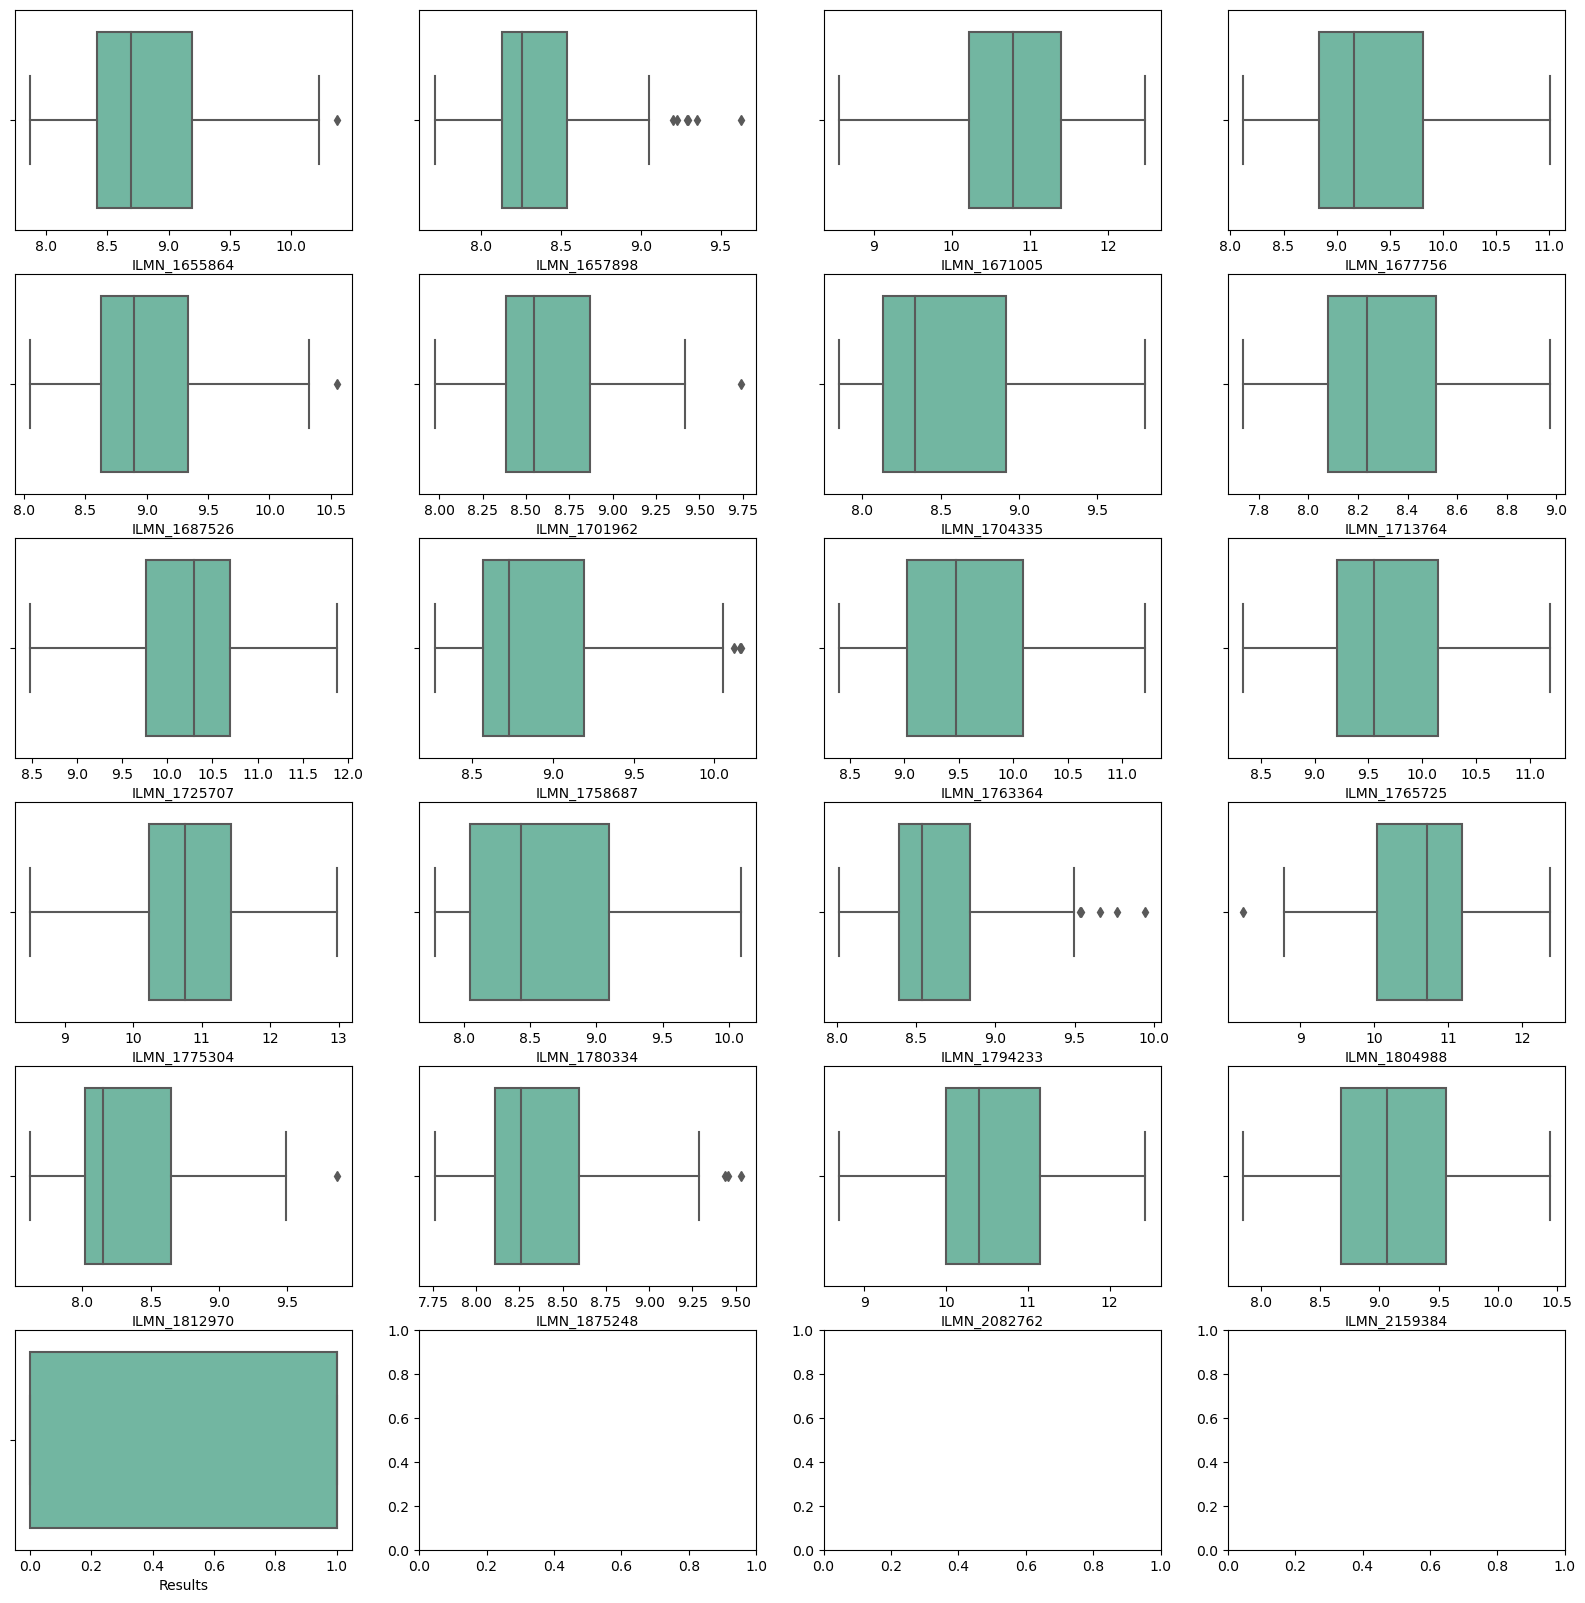

In [7]:
fig, axes = plt.subplots(6,4, figsize=(20,20))
x_,y_ = 0,0
for i, column in enumerate(df.columns[0:]):    
    sb.boxplot(x=df[column], ax=axes[x_,y_], palette="Set2")
    if i < 3:
        y_ += 1
    elif i == 3: 
        x_ = 1
        y_ = 0
    elif i == 7:
        x_ = 2
        y_ = 0
    elif i == 11:
        x_ = 3
        y_ = 0
    elif i == 15:
        x_ = 4
        y_ = 0 
    elif i == 19:
        x_ = 5
        y_ = 0

    else:
        y_ += 1

In [8]:
cols = df.columns
print(cols)
scaler = MinMaxScaler()
dat = scaler.fit_transform(df)
df_02 = pd.DataFrame(data=dat, columns=cols)  
print(df_02.head())

Index(['ILMN_1655864', 'ILMN_1657898', 'ILMN_1671005', 'ILMN_1677756',
       'ILMN_1687526', 'ILMN_1701962', 'ILMN_1704335', 'ILMN_1713764',
       'ILMN_1725707', 'ILMN_1758687', 'ILMN_1763364', 'ILMN_1765725',
       'ILMN_1775304', 'ILMN_1780334', 'ILMN_1794233', 'ILMN_1804988',
       'ILMN_1812970', 'ILMN_1875248', 'ILMN_2082762', 'ILMN_2159384',
       'Results'],
      dtype='object')
   ILMN_1655864  ILMN_1657898  ILMN_1671005  ILMN_1677756  ILMN_1687526  \
0      0.500200      0.634975      0.733529      0.648852      0.609927   
1      0.716362      0.479176      0.911329      0.852327      0.615295   
2      0.413998      0.328590      0.501123      0.435909      0.433819   
3      0.363611      0.259161      0.421587      0.126448      0.356462   
4      0.232173      0.265155      0.397474      0.149962      0.265804   

   ILMN_1701962  ILMN_1704335  ILMN_1713764  ILMN_1725707  ILMN_1758687  ...  \
0      0.610646      0.821628      0.204518      0.597115      0.587752  

In [9]:
x = df_02.drop(["Results"], axis =1);
y = df["Results"]
print(y.value_counts())

1    99
0    41
Name: Results, dtype: int64


(array([41.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 99.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

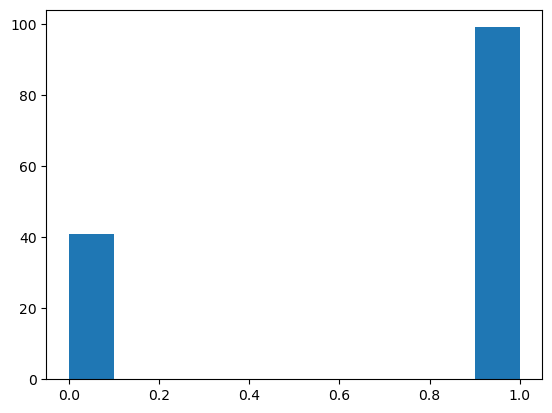

In [10]:
plt.hist(y)

1    58
0    41
Name: Results, dtype: int64


(array([41.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 58.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

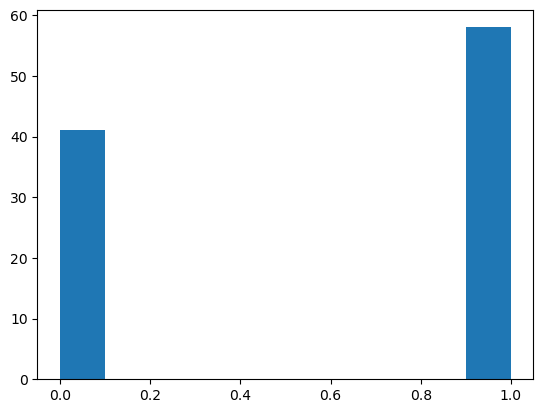

In [11]:
# transform the dataset
under = RandomUnderSampler(sampling_strategy= 0.7)
X, Y = under.fit_resample(x, y)
print(Y.value_counts())
plt.hist(Y)

0    58
1    58
Name: Results, dtype: int64


(array([58.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 58.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

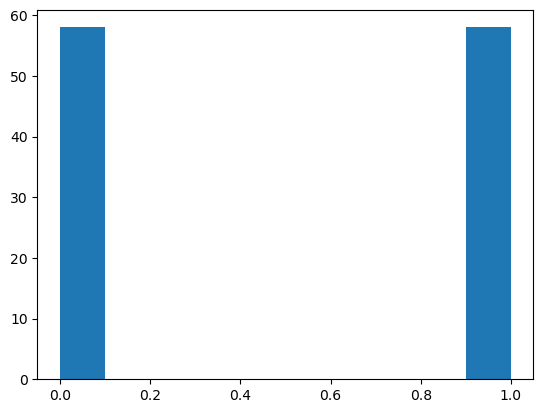

In [12]:
smt = SMOTE()
X, Y = smt.fit_resample(X,Y)
print(Y.value_counts())
plt.hist(Y)

In [13]:
# creating a decision tree classifier
dt_model = tree.DecisionTreeClassifier()
param_grid_dt = {
     
}
cv_array = [2,3,4,5]
for cv in cv_array:
    gridSearchRF = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, scoring='accuracy', n_jobs=-1, cv=cv)
    gridSearchRF.fit(X, Y)
    print("CV value : ", cv)
    print("Parameters : ", gridSearchRF.best_params_)
    print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
    print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {}
Accuracy :  84.483
Standed deviation :  10.345
CV value :  3
Parameters :  {}
Accuracy :  83.626
Standed deviation :  5.250
CV value :  4
Parameters :  {}
Accuracy :  87.931
Standed deviation :  7.109
CV value :  5
Parameters :  {}
Accuracy :  87.065
Standed deviation :  4.768


In [14]:
# creating a Gradient boosting classifier
gb_model = GradientBoostingClassifier()
param_grid_gb = {
     'random_state': [0, 1, 2,3,4,5 , 10, 20, 30, 40, 50]
}
for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {'random_state': 0}
Accuracy :  82.759
Standed deviation :  1.724
CV value :  3
Parameters :  {'random_state': 0}
Accuracy :  91.341
Standed deviation :  3.349
CV value :  4
Parameters :  {'random_state': 0}
Accuracy :  87.931
Standed deviation :  5.172
CV value :  5
Parameters :  {'random_state': 0}
Accuracy :  90.507
Standed deviation :  3.276


In [15]:
# creating a KNN classifier
KNN_model =KNeighborsClassifier()
param_grid_knn = {
     'n_neighbors': [3, 5, 7, 11, 13, 17]
}
for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=KNN_model, param_grid=param_grid_knn, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {'n_neighbors': 7}
Accuracy :  88.793
Standed deviation :  4.310
CV value :  3
Parameters :  {'n_neighbors': 11}
Accuracy :  87.045
Standed deviation :  3.725
CV value :  4
Parameters :  {'n_neighbors': 5}
Accuracy :  87.931
Standed deviation :  6.216
CV value :  5
Parameters :  {'n_neighbors': 5}
Accuracy :  88.696
Standed deviation :  6.507


In [16]:
# creating a Lgistic regression classifier
lr_model = LogisticRegression() 

param_grid_lr = {
     'max_iter': [100, 200, 300, 400, 500]
}
for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=lr_model, param_grid=param_grid_lr, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))


CV value :  2
Parameters :  {'max_iter': 100}
Accuracy :  85.345
Standed deviation :  4.310
CV value :  3
Parameters :  {'max_iter': 100}
Accuracy :  83.603
Standed deviation :  4.425
CV value :  4
Parameters :  {'max_iter': 100}
Accuracy :  83.621
Standed deviation :  4.479
CV value :  5
Parameters :  {'max_iter': 100}
Accuracy :  83.623
Standed deviation :  3.228


In [17]:
# creating a Nave Bayers classifier
nb_model = MultinomialNB()
param_grid_nb = {

}
for cv in cv_array:
    gridSearchRF = GridSearchCV(estimator=nb_model, param_grid=param_grid_nb, scoring='accuracy', n_jobs=-1, cv=cv)
    gridSearchRF.fit(X, Y)
    print("CV value : ", cv)
    print("Parameters : ", gridSearchRF.best_params_)
    print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
    print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))


CV value :  2
Parameters :  {}
Accuracy :  89.655
Standed deviation :  3.448
CV value :  3
Parameters :  {}
Accuracy :  89.609
Standed deviation :  5.666
CV value :  4
Parameters :  {}
Accuracy :  89.655
Standed deviation :  4.877
CV value :  5
Parameters :  {}
Accuracy :  89.601
Standed deviation :  3.542


In [18]:
# creating a SVM classifier
svm_model = svm.SVC()
param_grid_svm = {
     'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))


CV value :  2
Parameters :  {'kernel': 'linear'}
Accuracy :  87.069
Standed deviation :  4.310
CV value :  3
Parameters :  {'kernel': 'linear'}
Accuracy :  87.045
Standed deviation :  5.604
CV value :  4
Parameters :  {'kernel': 'rbf'}
Accuracy :  87.931
Standed deviation :  7.109
CV value :  5
Parameters :  {'kernel': 'linear'}
Accuracy :  87.029
Standed deviation :  4.831


In [19]:
# creating a Random forest classifier
rf = RandomForestClassifier()
param_grid_rf = {
     'max_depth': [80, 90, 100, 110, 150, 200, 300],
     'max_features': [2, 3, 4, 5,6],
     'n_estimators': [100, 200, 300]
}

for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=rf, param_grid=param_grid_rf, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {'max_depth': 90, 'max_features': 3, 'n_estimators': 100}
Accuracy :  89.655
Standed deviation :  1.724
CV value :  3
Parameters :  {'max_depth': 90, 'max_features': 2, 'n_estimators': 200}
Accuracy :  90.486
Standed deviation :  3.320
CV value :  4
Parameters :  {'max_depth': 110, 'max_features': 2, 'n_estimators': 100}
Accuracy :  90.517
Standed deviation :  4.479
CV value :  5
Parameters :  {'max_depth': 80, 'max_features': 2, 'n_estimators': 100}
Accuracy :  90.507
Standed deviation :  4.277
